<a href="https://colab.research.google.com/github/khanhduy0703/desktop-tutorial/blob/main/hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
DATASET_DIR = "/content/drive/MyDrive/5loaihoa_dataset"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ℹ️ Dataset đã có ở /content/flowers_cnn
TensorFlow: 2.19.0
GPU: []
Mixed precision: <DTypePolicy "mixed_float16">
Found 100 files belonging to 5 classes.
Using 80 files for training.
Found 100 files belonging to 5 classes.
Using 20 files for validation.
🌸 Lớp: ['hoabingandata_mono', 'hoahongdata_mono', 'hoaloakendata_mono', 'hoasendata_mono', 'hoatulipdata_mono']


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 6, 6, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,841,128 (18.47 MB)

 Trainable params: 790,021 (3.01 MB)

 Non-trainable params: 4,051,107 (15.45 MB)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 49s 11s/step - accuracy: 0.1586 - loss: 2.5642 - val_accuracy: 0.0000e+00 - val_loss: 1.5822 - learning_rate: 0.0010
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 9s/step - accuracy: 0.1990 - loss: 2.7152 - val_accuracy: 0.0000e+00 - val_loss: 1.9192 - learning_rate: 0.0010
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.2211 - loss: 2.1588 - val_accuracy: 0.0500 - val_loss: 2.1528 - learning_rate: 0.0010
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 13s/step - accuracy: 0.2750 - loss: 2.1179 - val_accuracy: 0.0500 - val_loss: 2.2297 - learning_rate: 0.0010
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 9s/step - accuracy: 0.1875 - loss: 2.1543 - val_accuracy: 0.0000e+00 - val_loss: 2.2141 - learning_rate: 0.0010
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 46s 12s/step - accuracy: 0.1758 - loss: 2.3483 - val_accuracy: 0.0000e+00 - val_loss: 2.0901 - learning_rate: 0.0010
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 13s/step - accuracy: 0.1500 - loss: 2.5816 - val_acc

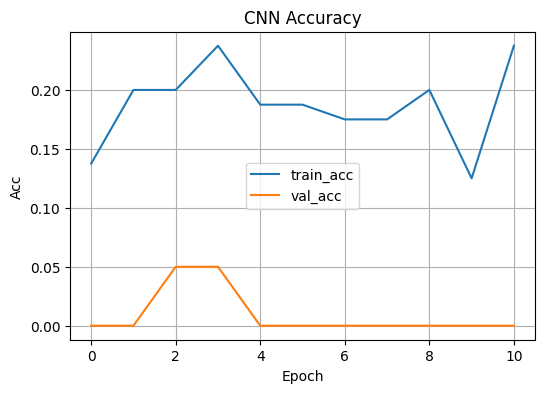

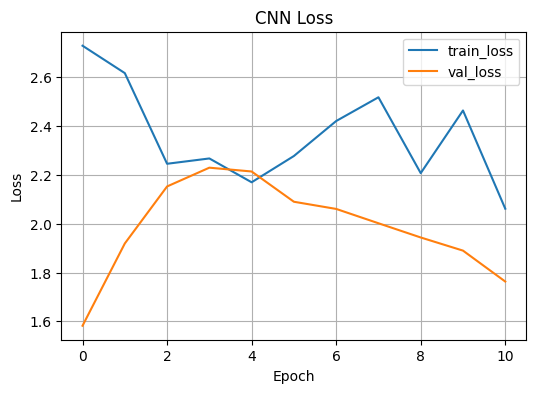

🔎 Classification Report:
                     precision    recall  f1-score   support

hoabingandata_mono     0.0000    0.0000    0.0000         0
  hoahongdata_mono     0.0000    0.0000    0.0000         0
hoaloakendata_mono     0.0000    0.0000    0.0000         0
   hoasendata_mono     0.0500    1.0000    0.0952         1
 hoatulipdata_mono     0.0000    0.0000    0.0000        19

          accuracy                         0.0500        20
         macro avg     0.0100    0.2000    0.0190        20
      weighted avg     0.0025    0.0500    0.0048        20



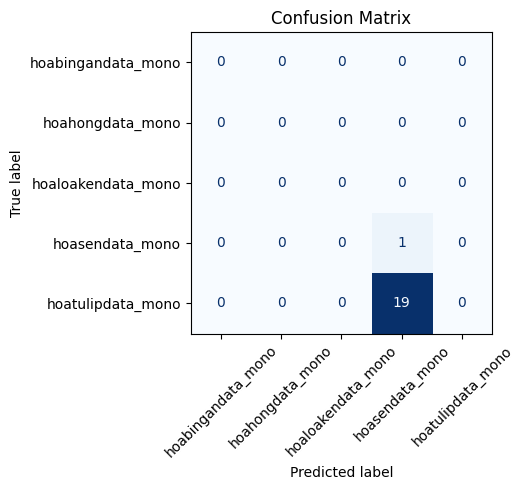

In [3]:
# ================== CNN TRAINING FLOWERS (EfficientNetB0 + Deeper Head) ==================
# Dataset: /content/drive/MyDrive/5loaihoa_dataset

import os, cv2, random, shutil, warnings
import numpy as np, matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from google.colab import drive

warnings.filterwarnings("ignore")

# -------- Drive & copy data --------
drive.mount('/content/drive')
DRIVE_DIR = "/content/drive/MyDrive/5loaihoa_dataset"
if not os.path.isdir(DRIVE_DIR):
    raise FileNotFoundError(f"Không tìm thấy {DRIVE_DIR}")

LOCAL_DIR = "/content/flowers_cnn"
if not os.path.exists(LOCAL_DIR):
    print("📦 Copy dataset từ Drive sang máy ảo ...")
    shutil.copytree(DRIVE_DIR, LOCAL_DIR)
else:
    print("ℹ️ Dataset đã có ở", LOCAL_DIR)

# -------- TF setup ----------
print("TensorFlow:", tf.__version__)
print("GPU:", tf.config.list_physical_devices('GPU'))
try:
    tf.keras.mixed_precision.set_global_policy('mixed_float16')
    print("Mixed precision:", tf.keras.mixed_precision.global_policy())
except Exception as e:
    print("Mixed precision not set:", e)

SEED = 42
tf.random.set_seed(SEED); np.random.seed(SEED); random.seed(SEED)

# -------- Dataloader ----------
img_size   = (192, 192)
batch_size = 32
val_split  = 0.2
AUTOTUNE   = tf.data.AUTOTUNE

train_ds_raw = tf.keras.utils.image_dataset_from_directory(
    LOCAL_DIR, validation_split=val_split, subset="training", seed=SEED,
    image_size=img_size, batch_size=batch_size, shuffle=True
)
val_ds_raw = tf.keras.utils.image_dataset_from_directory(
    LOCAL_DIR, validation_split=val_split, subset="validation", seed=SEED,
    image_size=img_size, batch_size=batch_size, shuffle=False
)

class_names = train_ds_raw.class_names
num_classes = len(class_names)
idx_to_label = {i: n for i, n in enumerate(class_names)}
print("🌸 Lớp:", class_names)

# Class weights
train_labels = np.concatenate([y.numpy() for _, y in train_ds_raw], axis=0)
cw = class_weight.compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weight_dict = {i: float(w) for i, w in enumerate(cw)}

# Preprocess CNN
def preprocess_cnn(x, y):
    x = tf.cast(x, tf.float32) / 255.0  # chuẩn hóa
    return x, y

train_ds = train_ds_raw.map(preprocess_cnn, num_parallel_calls=AUTOTUNE).cache().shuffle(1024, seed=SEED).prefetch(AUTOTUNE)
val_ds   = val_ds_raw  .map(preprocess_cnn, num_parallel_calls=AUTOTUNE).cache().prefetch(AUTOTUNE)

# -------- CNN model (EfficientNetB0 + deeper head) ----------
from tensorflow.keras.applications import EfficientNetB0
base = EfficientNetB0(include_top=False, weights="imagenet", input_shape=(*img_size, 3))
base.trainable = False  # freeze ban đầu

model = models.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax', dtype='float32'),
])

model.compile(optimizer=Adam(1e-3), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# -------- Training ----------
CKPT_DIR = "/content/drive/MyDrive/flower_models_cnn"
os.makedirs(CKPT_DIR, exist_ok=True)
BEST = os.path.join(CKPT_DIR, "best_cnn.keras")

cbs = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
    ModelCheckpoint(BEST, monitor='val_accuracy', save_best_only=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    class_weight=class_weight_dict,
    callbacks=cbs,
    verbose=1
)

# Load best & save final
model = load_model(BEST)
FINAL = os.path.join(CKPT_DIR, "flower_cnn_final.keras")
model.save(FINAL)
print("✅ Saved:", FINAL)

# -------- Curves --------
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('CNN Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Acc')
plt.legend(); plt.grid(True); plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('CNN Loss'); plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.legend(); plt.grid(True); plt.show()

# -------- Eval --------
preds = model.predict(val_ds, verbose=0)
y_pred = np.argmax(preds, axis=1)
y_true = np.concatenate([y.numpy() for _, y in val_ds])

labels = list(range(num_classes))

print("🔎 Classification Report:\n",
      classification_report(
          y_true, y_pred,
          labels=labels,
          target_names=[idx_to_label[i] for i in labels],
          digits=4,
          zero_division=0
      )
)

cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[idx_to_label[i] for i in labels])
fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax, xticks_rotation=45, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


✅ Loaded model: /content/drive/MyDrive/flower_models_cnn/flower_cnn_final.keras
🌸 Lớp: ['hoa bỉ ngạn', 'hoa hồng', 'hoa loa kèn', 'hoa sen', 'hoa tulip']


Saving images (4).jpg to images (4) (1).jpg

📷 Ảnh: images (4) (1).jpg


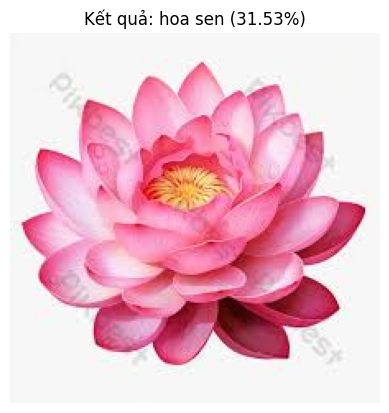

hoa bỉ ngạn    : 21.37%
hoa hồng       : 10.77%
hoa loa kèn    : 25.29%
hoa sen        : 31.53%
hoa tulip      : 11.03%


In [20]:
# ================== PREDICT IMAGE FLOWERS ==================
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from google.colab import files
import cv2, os

# ----- Load model đã train -----
MODEL_PATH = "/content/drive/MyDrive/flower_models_cnn/flower_cnn_final.keras"
model = load_model(MODEL_PATH)
print("✅ Loaded model:", MODEL_PATH)

# Class names lấy lại từ training
class_names = ['hoa bỉ ngạn','hoa hồng','hoa loa kèn','hoa sen','hoa tulip']  # sửa theo dataset của bạn
print("🌸 Lớp:", class_names)

# ----- Hàm dự đoán -----
def predict_image(img_path, img_size=(192,192)):
    # Đọc ảnh
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, img_size)
    x = np.expand_dims(img_resized, axis=0) / 255.0

    # Dự đoán
    preds = model.predict(x, verbose=0)[0]
    top_idx = np.argmax(preds)
    top_class = class_names[top_idx]
    top_prob  = preds[top_idx] * 100

    # Hiển thị
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Kết quả: {top_class} ({top_prob:.2f}%)")
    plt.show()

    # In toàn bộ xác suất
    for i, c in enumerate(class_names):
        print(f"{c:15s}: {preds[i]*100:.2f}%")

# ----- Upload ảnh và chạy dự đoán -----
uploaded = files.upload()  # upload 1 hoặc nhiều ảnh
for fn in uploaded.keys():
    print("\n📷 Ảnh:", fn)
    predict_image(fn, img_size=(192,192))
